In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sympy import *

Linear Regression
ypred = f(X)
y = B0 + B1X -> this is same as y = mx + c
(B1/m = slope , B0/c = intercept[intercept is when X=0 , Y=B0/c])

c/B0 is the irrudicble error i.e Y is dependent to X so Y can only be predicted from X but there is no relation in our c with x i.e. neither x and c are related to ech other.




In [3]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [5]:
df1 = df['total_rooms']
df2 = df['total_bedrooms']

In [6]:
df1 = df1.to_numpy()
df1

array([3885., 1510., 3589., ...,  956.,   96., 1765.])

In [7]:
df2 = df2.to_numpy()

In [8]:
df2

array([661., 310., 507., ..., 201.,  14., 263.])

In [55]:
np.cov(df1)

array(4646582.61134867)

In [56]:
np.cov(df2)

array(172768.55375081)

In [16]:
def mean(arr):
     
    sum = 0
    for i in range(0, len(arr)):
        sum = sum + arr[i]
     
    return sum / len(arr)
def covariance(arr1, arr2):
 
    sum = 0
    for i in range(0, len(arr1)):
        sum = (sum + (arr1[i] - mean(arr1)) *
                      (arr2[i] - mean(arr2)))
     
    return sum / (len(arr1) - 1)

def variance(x):
  xbar = mean(x)
  mean_difference_squared_readings = [pow((x - xbar), 2) for xs in x]
  variance = sum(mean_difference_squared_readings)
  return variance/float(len(x)-1)    

def beta(x,y):
  beta = covariance(x,y) / variance(x)
  return beta


def epsilon(x, y):
  epsilon = mean(y ) - (beta(x,y)*mean(x))
  return epsilon  

In [17]:
mean(df1)

2599.578666666667

In [18]:
variance(df1)

array([1652858.95717424, 1187577.53003175,  979281.00185577, ...,
       2702251.58404985, 6269996.13890138,  696753.80212252])

In [19]:
covariance(df1,df2)

840206.340327665

In [22]:
a = epsilon(df1,df2)
a

array([ -791.5065989 , -1309.24081572, -1700.44334054, ...,
        -278.33176374,   181.59598996, -2604.84740872])

In [23]:
b = beta(df1,df2)
b

array([0.50833517, 0.70749599, 0.85798289, ..., 0.31092824, 0.13400428,
       1.20588698])

In [102]:
len(a) == len(b)

True

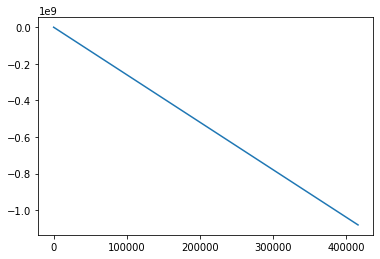

In [105]:
sns.lineplot(x=b, y=a)

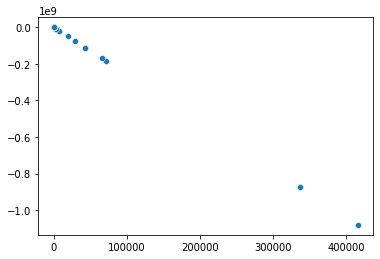

In [106]:
sns.scatterplot(x=b, y=a)

Gradient Descent 
for initializing gradient descent we need a equation relation of x and y and we must differentiate y wrt x  to obtain the gradient descent 

In [27]:
#let first initiate an eqn
x = symbols('x')
eqn = (x+5)**2
diff_eqn = Derivative(eqn, x) 
diff_eqn

Derivative((x + 5)**2, x)

In [28]:
diff_eqn_ans = diff_eqn.doit()
diff_eqn_ans

2*x + 10

In [33]:
alpha = 0.1
x0 = 3
x1 =  x0 - alpha*diff_eqn_ans

In [34]:
x1

2.0 - 0.2*x

In [81]:
x_nought = 3 #wheer the algorithm starts
alpha = 0.01 #alpha_learning_rate
precision = 0.000001
previous_step_size  = 1
max_iters = 10000 #maximum numbers of iterations that need to be carried
iters =0 #initiating the iter counter
df = lambda x: 2*(x+10) #gradient of our function

plot = []
iter_plot = []
while previous_step_size > precision and iters < max_iters:
  prev_x = x_nought #store current x value in prev_x
  x_nought = x_nought - alpha*df(prev_x) #grad descent
  previous_step_size = abs(x_nought - prev_x)# change in x
  iters = iters+1 #iteration count
  plot.append(x_nought)
  iter_plot.append(prev_x)
  print('Iterations', iters, 'X value is', x_nought) #prints all the iterations

Iterations 1 X value is 2.74
Iterations 2 X value is 2.4852000000000003
Iterations 3 X value is 2.2354960000000004
Iterations 4 X value is 1.9907860800000003
Iterations 5 X value is 1.7509703584000003
Iterations 6 X value is 1.5159509512320002
Iterations 7 X value is 1.2856319322073602
Iterations 8 X value is 1.059919293563213
Iterations 9 X value is 0.8387209076919486
Iterations 10 X value is 0.6219464895381097
Iterations 11 X value is 0.40950755974734754
Iterations 12 X value is 0.2013174085524006
Iterations 13 X value is -0.0027089396186474046
Iterations 14 X value is -0.20265476082627445
Iterations 15 X value is -0.39860166560974897
Iterations 16 X value is -0.5906296322975539
Iterations 17 X value is -0.7788170396516029
Iterations 18 X value is -0.9632406988585708
Iterations 19 X value is -1.1439758848813995
Iterations 20 X value is -1.3210963671837714
Iterations 21 X value is -1.494674439840096
Iterations 22 X value is -1.664780951043294
Iterations 23 X value is -1.83148533202242

In [82]:
print('The local minima is', x_nought,'Occurs at',iters,'th iteration') 

The local minima is -9.999951818068483 Occurs at 619 th iteration


In [83]:
plot

[2.74,
 2.4852000000000003,
 2.2354960000000004,
 1.9907860800000003,
 1.7509703584000003,
 1.5159509512320002,
 1.2856319322073602,
 1.059919293563213,
 0.8387209076919486,
 0.6219464895381097,
 0.40950755974734754,
 0.2013174085524006,
 -0.0027089396186474046,
 -0.20265476082627445,
 -0.39860166560974897,
 -0.5906296322975539,
 -0.7788170396516029,
 -0.9632406988585708,
 -1.1439758848813995,
 -1.3210963671837714,
 -1.494674439840096,
 -1.664780951043294,
 -1.8314853320224282,
 -1.9948556253819798,
 -2.15495851287434,
 -2.311859342616853,
 -2.465622155764516,
 -2.616309712649226,
 -2.7639835183962416,
 -2.908703848028317,
 -3.0505297710677506,
 -3.1895191756463954,
 -3.3257287921334675,
 -3.459214216290798,
 -3.590029931964982,
 -3.718229333325682,
 -3.8438647466591687,
 -3.966987451725985,
 -4.0876477026914655,
 -4.205894748637636,
 -4.3217768536648835,
 -4.435341316591586,
 -4.546634490259755,
 -4.655701800454559,
 -4.762587764445468,
 -4.867336009156558,
 -4.9699892889734265,
 -5.0

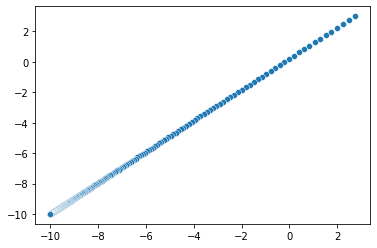

In [84]:
sns.scatterplot(x=plot, y=iter_plot)

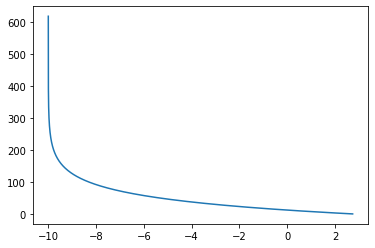

In [87]:
sns.lineplot(x=plot, y=iter_plot)

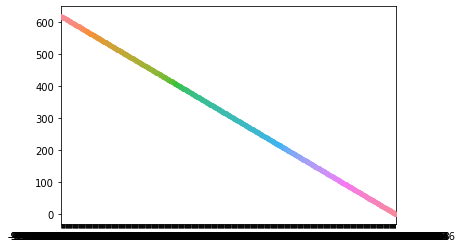

In [66]:
sns.stripplot(x=plot, y=iter_plot)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


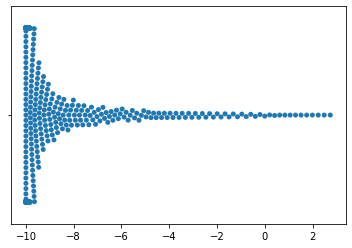

In [88]:
sns.swarmplot(x=plot)

lets increase the learning rate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


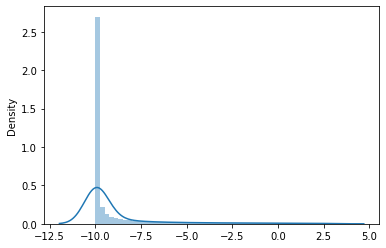

In [89]:
sns.distplot(x=plot)

In [86]:
x_nought = 3 #wheer the algorithm starts
alpha = 0.01 #alpha_learning_rate
precision = 0.000001
previous_step_size  = 1
max_iters = 10000 #maximum numbers of iterations that need to be carried
iters =0 #initiating the iter counter
df = lambda x: 2*(x+10) #gradient of our function

plot = []
iter_plot = []
while previous_step_size > precision and iters < max_iters:
  prev_x = x_nought #store current x value in prev_x
  x_nought = x_nought - alpha*df(prev_x) #grad descent
  previous_step_size = abs(x_nought - prev_x)# change in x
  iters = iters+1 #iteration count
  plot.append(x_nought)
  iter_plot.append(iters)
  print('Iterations', iters, 'X value is', x_nought) #prints all the iterations

Iterations 1 X value is 2.74
Iterations 2 X value is 2.4852000000000003
Iterations 3 X value is 2.2354960000000004
Iterations 4 X value is 1.9907860800000003
Iterations 5 X value is 1.7509703584000003
Iterations 6 X value is 1.5159509512320002
Iterations 7 X value is 1.2856319322073602
Iterations 8 X value is 1.059919293563213
Iterations 9 X value is 0.8387209076919486
Iterations 10 X value is 0.6219464895381097
Iterations 11 X value is 0.40950755974734754
Iterations 12 X value is 0.2013174085524006
Iterations 13 X value is -0.0027089396186474046
Iterations 14 X value is -0.20265476082627445
Iterations 15 X value is -0.39860166560974897
Iterations 16 X value is -0.5906296322975539
Iterations 17 X value is -0.7788170396516029
Iterations 18 X value is -0.9632406988585708
Iterations 19 X value is -1.1439758848813995
Iterations 20 X value is -1.3210963671837714
Iterations 21 X value is -1.494674439840096
Iterations 22 X value is -1.664780951043294
Iterations 23 X value is -1.83148533202242

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


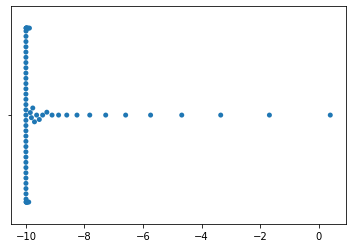

In [69]:
sns.swarmplot(x=plot)

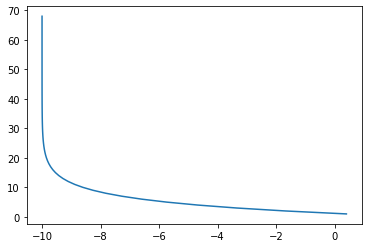

In [70]:
sns.lineplot(x=plot, y=iter_plot)

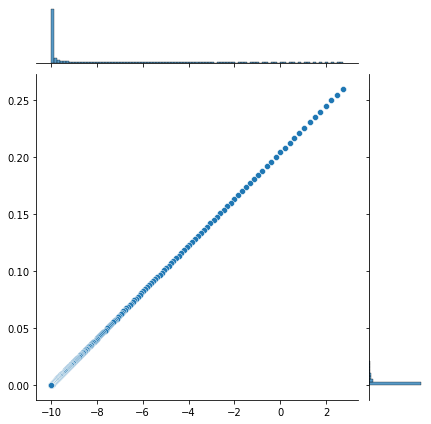

In [80]:
sns.jointplot(x=plot, y=iter_plot)

AttributeError: ignored